In [18]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.datasets import reuters


import matplotlib.pyplot as plt 

In [19]:
# mnist 데이터셋 로드
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [20]:
category = np.max(y_train)+1
print(category, '카테고리')
print(len(X_train), '학습용')
print(len(X_test), '테스트용')
print(X_train[0])

46 카테고리
8982 학습용
2246 테스트용
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [21]:
# 단어의 수를 맞추기

X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [22]:
# 원-핫 인코딩

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
# 모델의 구조 설정

model = Sequential()
model.add(Embedding(1000, 1000))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))
model.summary()

#  8. model 실행 옵션 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_path = './data/model/LSTM.hdf5'

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

hist = model.fit(X_train, y_train, epochs=200, batch_size=20,
                validation_data = (X_test, y_test), callbacks=[early_stopping])

print('test 정확도:', model.evaluate(X_test, y_test)[1])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 1000)        1000000   
                                                                 
 lstm_7 (LSTM)               (None, 100)               440400    
                                                                 
 dense_7 (Dense)             (None, 46)                4646      
                                                                 
Total params: 1,445,046
Trainable params: 1,445,046
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
450/450 [==============================] - 138s 300ms/step - loss: 1.8811 - accuracy: 0.5320 - val_loss: 1.6246 - val_accuracy: 0.6015
Epoch 2/200
450/450 [==============================] - 139s 308ms/step - loss: 1.4574 - accuracy: 0.6363 - val_loss: 1.4853 - val_accuracy: 0.6331
Epoch 3/200
45

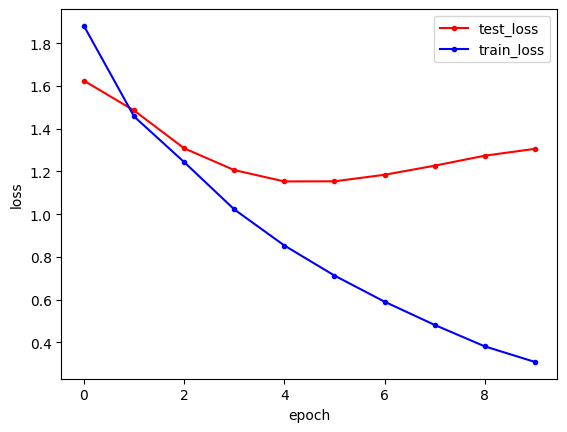

In [27]:
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'r.-', label='test_loss')
plt.plot(x_len, y_loss, 'b.-', label='train_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
test_news = ['중부 지방은 대체로 맑으나 남부 지방은 구름이 많겠습니다',
            '이번 선거에는 누가 이길 수 있을까?',
            ' 올 초부터 유동성의 힘으로 주가가 일정하게 상승']